For illustration, here is a spline interpolant using just a few nodes. 

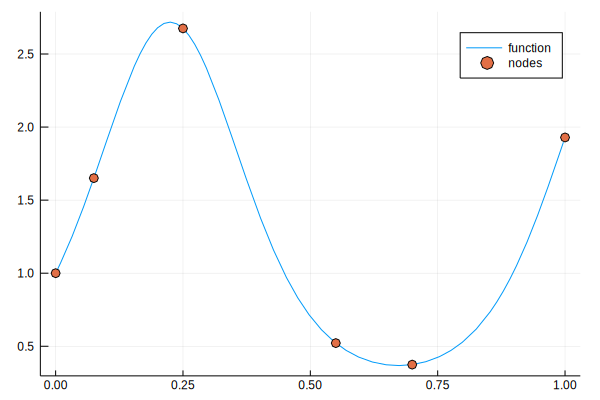

In [1]:
f = x -> exp(sin(7*x))

using Plots
plot(f,0,1,label="function")

t = [0, 0.075, 0.25, 0.55, 0.7, 1]  # nodes
y = f.(t)                           # values at nodes

plot!(t,y,m=:o,l=nothing,label="nodes")

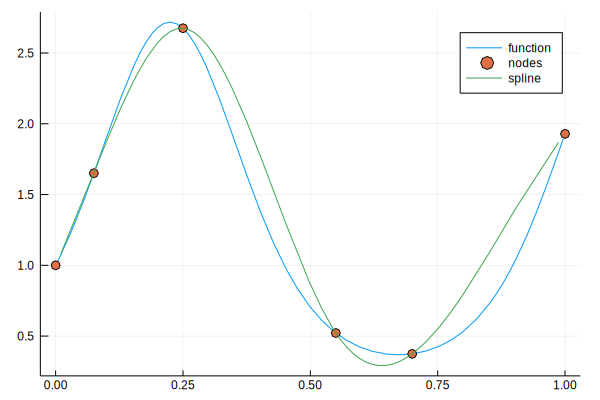

In [2]:
include("../FNC.jl")
S = FNC.spinterp(t,y)

plot!(S,0,1,label="spline")

Now we look at the convergence rate as the number of nodes increases.

In [3]:
x = (0:10000)/1e4          # sample the difference at many points
n_ = @. round(Int,2^(3:0.5:8))  # numbers of nodes
err_ = zeros(size(n_))
for (i,n) = enumerate(n_)
    t = (0:n)/n 
    S = FNC.spinterp(t,f.(t))
    err_[i] = maximum( @. abs(f(x)-S(x)) )
end

@show err_;

err_ = [0.0305634, 0.0207562, 0.00590761, 0.00134587, 0.000367049, 9.17785e-5, 2.15306e-5, 5.04292e-6, 1.24012e-6, 3.00426e-7, 7.31944e-8]


Since we expect convergence that is $O(h^4)=O(n^{-4})$, we use a log-log graph of error and expect a straight line of slope $-4$.

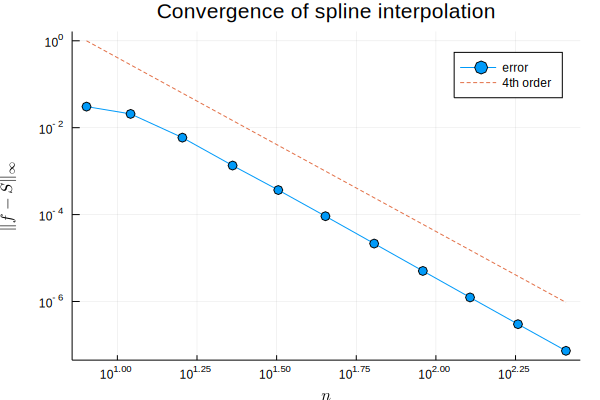

In [4]:
using LaTeXStrings
order4 = @. (n_/n_[1])^(-4)
plot(n_,[err_,order4],m=[:o :none],l=[:solid :dash],label=["error","4th order"],
    xaxis=(:log10,L"n"),yaxis=(:log10,L"\| f-S \|_\infty"),
    title="Convergence of spline interpolation")